In [18]:
%pip install python-mnist
%matplotlib inline
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np


Note: you may need to restart the kernel to use updated packages.


In [14]:
# Load the data
# load data

(X_train,y_train),(X_test,y_test) = mnist.load_data()
print("Train data")
print(f"X Train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print("*"*100)
print("Test data")
print(f"X Test: {X_test.shape}")
print(f"Y Text: {y_test.shape}")


Train data
X Train: (60000, 28, 28)
y train: (60000,)
****************************************************************************************************
Test data
X Test: (10000, 28, 28)
Y Text: (10000,)


From the data above, we can already tell a few things
<li>The Train and test data has 60000 and 10000 images respectively</li>
<li>The images have a dimention of 28 by 28 pixels</li>

## Plotting the images

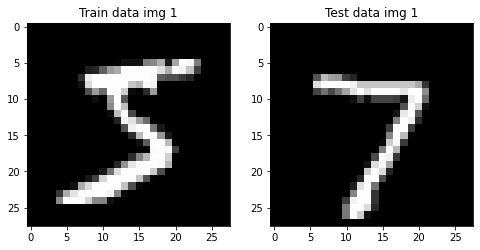

In [21]:
# Plot the first image on the train and test data

fig = plt.figure(figsize=(8,4))

fig.add_subplot(121)
plt.title("Train data img 1")
img_train = y_train[0]
plt.imshow(X_train[0], cmap='gray')

fig.add_subplot(122)
plt.title("Test data img 1")
img_test = y_test[0]
plt.imshow(X_test[0], cmap='gray')

plt.show()

# display(X_train)

Since we are interesed in dimentionality reduction, <br>we will need to reshape the data arrays into a <strong>single colour channel</strong>

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28,28,1))
X_test = X_test.reshape((X_test.shape[0], 28,28,1))

In [4]:
# Since we will no longer need Mnist data, we can uninstall the package
%pip uninstall mnist
print("Successfully removed mnist")

Note: you may need to restart the kernel to use updated packages.
Successfully removed mnist
